In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from textwrap import wrap
import random
from utils import *

In [44]:
df = pd.read_excel("bar chart compare.xlsx")
# sort by domains list order
df["domain"] = pd.Categorical(df["domain"], domains)
df["subdomain"] = pd.Categorical(df["subdomain"], subdomains)
df = df.sort_values(["domain", "subdomain"])
df

,domain,subdomain,value
14,Natural Sciences,Biology,38.220
15,Natural Sciences,Chemistry,21.158
16,Natural Sciences,Earth & Env Sciences,33.693
17,Natural Sciences,Math & Stat,22.333
18,Natural Sciences,Physics & Astronomy,20.034
0,Applied Sciences,"Agri, Fish & Forestry",38.034
1,Applied Sciences,Built Env & Design,34.696
2,Applied Sciences,Enab & Strategic Tech,23.360
3,Applied Sciences,Engineering,23.780
4,Applied Sciences,Info & Com Tech,28.459


In [45]:
# Create a bar chart
fig = go.Figure()

for i, domain in enumerate(domains):
    t = df.query("domain == @domain")
    fig.add_trace(
        go.Bar(
            x=t["value"],
            y=t["subdomain"],
            orientation="h",
            marker_color=domain_colors[domain],
            showlegend=False,
        )
    )

# Customize layout
fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=500,
    width=400,
    margin=dict(l=100, r=20, t=50, b=20),
)

fig.update_xaxes(
    title="% women corresponding authors<br>in all publications",
    mirror=True,
    range=[0, 100],
)
fig.update_yaxes(autorange="reversed", mirror=True)

# add reference line at 50%
fig.add_vline(x=50, line_width=1, line_dash="dash", line_color="black")

# Show the plot
fig.show()
fig.write_image("figures/bar_chart_compare.svg")

## Fig 2(a) - distribution of demale across domains and relative difference after CEM

In [46]:
df1 = pd.read_excel("bar chart compare.xlsx", sheet_name="diff")
# sort by domains list order
df1["domain"] = pd.Categorical(df1["domain"], domains)
df1["subdomain"] = pd.Categorical(df1["subdomain"], subdomains)
df1 = df1.sort_values(["domain", "subdomain"])
df1

,domain,subdomain,value
1,Natural Sciences,Biology,-0.483
4,Natural Sciences,Chemistry,1.278
7,Natural Sciences,Earth & Env Sciences,5.219
13,Natural Sciences,Math & Stat,-10.852
15,Natural Sciences,Physics & Astronomy,-4.740
0,Applied Sciences,"Agri, Fish & Forestry",13.616
3,Applied Sciences,Built Env & Design,-0.954
9,Applied Sciences,Enab & Strategic Tech,0.635
10,Applied Sciences,Engineering,5.910
12,Applied Sciences,Info & Com Tech,3.060


In [47]:
df2 = pd.read_excel("bar chart compare.xlsx", sheet_name="reg")
df2["upper"] = df2.apply(lambda x: get_ci(x["est"], x["error"])[1], axis=1)
df2["ci_error"] = df2["upper"] - df2["odds_ratio"]
df2["indicator"] = df2.apply(
    lambda x: get_indicator(x["odds_ratio"], x["pval"]), axis=1
)

# reordering
df2["subdomain"] = pd.Categorical(df2["subdomain"], subdomains)
df2 = df2.sort_values("subdomain")
df2

,subdomain,est,error,pval,gender,odds_ratio,upper,ci_error,indicator
4,Biology,0.012323,0.034374,NaN,1,1.012399,1.082958,0.070559,0
3,Chemistry,-0.017560,0.064650,NaN,0,0.982593,1.115334,0.132741,0
2,Earth & Env Sciences,0.071000,0.044800,NaN,1,1.073581,1.172113,0.098532,0
1,Math & Stat,-0.360000,0.268000,NaN,0,0.697676,1.179723,0.482047,0
0,Physics & Astronomy,-0.056000,0.052700,NaN,0,0.945539,1.048428,0.102889,0
18,"Agri, Fish & Forestry",0.143030,0.063189,*,1,1.153765,1.305884,0.152119,1
17,Built Env & Design,-0.205768,0.167424,NaN,0,0.814022,1.130187,0.316165,0
16,Enab & Strategic Tech,0.030330,0.043530,NaN,1,1.030795,1.122602,0.091807,0
15,Engineering,0.159315,0.083196,NaN,1,1.172707,1.380408,0.207701,0
14,Info & Com Tech,0.224774,0.087237,**,1,1.252040,1.485511,0.233471,1


In [ ]:
# Create a bar chart
fig = make_subplots(rows=1, cols=2, shared_yaxes=True, horizontal_spacing=0.1)

for i, domain in enumerate(domains):
    t = df1.query("domain == @domain")
    fig.add_trace(
        go.Bar(
            x=t["value"],
            y=t["subdomain"],
            orientation="h",
            marker_color=domain_colors[domain],
            showlegend=False,
        ),
        row=1,
        col=1,
    )

fig.update_xaxes(
    title="Relative diff. in % women corr. authors<br>(treatment over control)", mirror=True, row=1, col=1
)
fig.update_yaxes(autorange="reversed", mirror=True, row=1, col=1)

# add reference line at 0
fig.add_vline(x=0, line_width=1, line_dash="dash", line_color="black", row=1, col=1)

# add gray shading for negative values
fig.add_shape(
    type="rect",
    xref="x",
    yref="paper",
    x0=0,
    y0=0,
    x1=df["value"].min() - 2,
    y1=1,
    fillcolor="gray",
    opacity=0.1,
    layer="below",
    line_width=0,
    row=1,
    col=1,
)

# Create a forest chart
indicators = [-1, 0, 1]

for i, subdomain in enumerate(subdomains):
    for j, indicator in enumerate(indicators):
        t = df2.query("subdomain == @subdomain and indicator == @indicator")

        fig.add_trace(
            go.Scatter(
                x=t["odds_ratio"],
                y=t["subdomain"],
                error_x=dict(
                    type="data",
                    array=t["ci_error"],
                    visible=True,
                    color=indicator_colors[indicator],
                    width=0,
                ),
                orientation="h",
                marker_color=indicator_colors[indicator],
                showlegend=False,
            ),
            row=1,
            col=2,
        )

# Customize layout
fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=500,
    width=700,
    margin=dict(l=100, r=20, t=50, b=20),
)

fig.update_xaxes(title="Odds ratio of being cited in media<br>(women over men)", mirror=True, row=1, col=2)
fig.update_yaxes(autorange="reversed", mirror=True, row=1, col=2)


# add reference line at 50%
fig.add_vline(x=1, line_width=1, line_dash="dash", line_color="black", row=1, col=2)

# Show the plot
fig.show()
fig.write_image("figures/bar_chart_compare_reg.svg")

In [49]:
df = pd.read_excel("bar chart compare.xlsx", sheet_name="scatter")
df["domain"] = pd.Categorical(df["domain"], domains)
df["subdomain"] = pd.Categorical(df["subdomain"], subdomains)
df = df.sort_values(["domain", "subdomain"])
df

,domain,subdomain,relative diff %,con_val,treat_val,value
14,Natural Sciences,Biology,0.483,38.769,38.580,38.220
15,Natural Sciences,Chemistry,1.278,19.488,19.737,21.158
16,Natural Sciences,Earth & Env Sciences,5.219,33.270,35.010,33.693
17,Natural Sciences,Math & Stat,10.852,28.040,25.000,22.333
18,Natural Sciences,Physics & Astronomy,4.740,22.060,21.018,20.034
0,Applied Sciences,"Agri, Fish & Forestry",13.616,37.667,42.796,38.034
1,Applied Sciences,Built Env & Design,0.954,36.129,35.784,34.696
2,Applied Sciences,Enab & Strategic Tech,0.635,22.495,22.638,23.360
3,Applied Sciences,Engineering,5.910,25.775,27.300,23.780
4,Applied Sciences,Info & Com Tech,3.060,30.954,31.904,28.459


In [50]:
# Create a bar chart
fig = go.Figure()

for i, domain in enumerate(domains):
    t = df.query("domain == @domain")
    fig.add_trace(
        go.Scatter(
            x=t["treat_val"],
            y=t["con_val"],
            text=t["subdomain"],
            mode="markers",
            marker_color=domain_colors[domain],
            hoverinfo="x+y+text",
            name=domain,
            showlegend=True,
        )
    )

# Customize layout
fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=500,
    width=700,
    margin=dict(l=100, r=100, t=50, b=20),
    legend=dict(
        x=1.01,
        y=0.99,
        bgcolor="rgba(255, 255, 255, 0.5)",
    ),
)

fig.update_xaxes(
    title="% women corresponding authors<br>in treatment group",
    mirror=True,
    range=[15, 68],
    dtick=10,
)
fig.update_yaxes(
    title="% women corresponding authors<br>in control group",
    mirror=True,
    range=[15, 68],
    dtick=10,
)

# add reference line
fig.add_trace(
    go.Scatter(
        x=[0, 100],
        y=[0, 100],
        mode="lines",
        line=dict(color="black", width=1, dash="dash"),
        showlegend=False,
    )
)
fig.add_vline(x=50, line_width=1, line_dash="dash", line_color="black")
fig.add_hline(y=50, line_width=1, line_dash="dash", line_color="black")

# annotate points with relative diff > 10%
for i, row in df[df["relative diff %"] >= 8].iterrows():
    if row["treat_val"] > row["con_val"]:
        ax = 30
    else:
        ax = -30
    ay = -18
    if row["subdomain"] == "Phil. & Theo.":
        ay = 20
    fig.add_annotation(
        x=row["treat_val"],
        y=row["con_val"],
        text=row["subdomain"],
        ax=ax,
        ay=ay,
        showarrow=True,
    )

fig.add_annotation(
    x=0.99,
    y=0.01,
    xref="x domain",
    yref="y domain",
    text="<b>Treatment > control",
    font=dict(size=20),
    showarrow=False,
)

fig.add_annotation(
    x=0.01,
    y=0.99,
    xref="x domain",
    yref="y domain",
    text="<b>Treatment < control",
    font=dict(size=20),
    showarrow=False,
)

# Show the plot
fig.show()
fig.write_image("figures/bar_chart_compare_scatter.svg")

### Raw count regression domain level

In [51]:
df = pd.read_excel("raw count.xlsx", sheet_name="domain")
df["upper"] = df.apply(lambda x: get_ci(x["est"], x["error"], isExp=False)[1], axis=1)
df["ci_error"] = df["upper"] - df["est"]
df["indicator"] = df.apply(
    lambda x: get_indicator(x["est"], x["pval"], thresh=0), axis=1
)
# reordering
df["domain"] = pd.Categorical(df["domain"], domains)
df = df.sort_values("domain")
df

,domain,est,error,pval,effect,upper,ci_error,indicator
4,Natural Sciences,-0.17640,0.00480,***,-0.02,-0.166992,0.009408,-1
0,Applied Sciences,-0.07398,0.00718,***,-0.04,-0.059907,0.014073,-1
3,Health Sciences,-0.07960,0.00238,***,-0.04,-0.074935,0.004665,-1
2,Economic & Social Sciences,-0.16700,0.00870,***,-0.07,-0.149948,0.017052,-1
1,Arts & Humanities,-0.24050,0.01650,***,-0.16,-0.208160,0.032340,-1


In [52]:
# Create a bar chart
indicators = [-1, 0, 1]
fig = go.Figure()

for i, domain in enumerate(domains):
    for j, indicator in enumerate(indicators):
        t = df.query("domain == @domain and indicator == @indicator")
        fig.add_trace(
            go.Scatter(
                x=t["est"],
                y=t["domain"],
                error_x=dict(
                    type="data",
                    array=t["ci_error"],
                    visible=True,
                    color=indicator_colors[indicator],
                    width=0,
                ),
                orientation="h",
                marker_color=indicator_colors[indicator],
                showlegend=False,
            )
        )

# Customize layout
fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=250,
    width=400,
    margin=dict(l=100, r=20, t=50, b=20),
)

fig.update_xaxes(title="Difference in media citation<br>(women over men)", mirror=True)
fig.update_yaxes(autorange="reversed", mirror=True)

# add reference line
fig.add_vline(x=0, line_width=1, line_dash="dash", line_color="black")

# Show the plot
fig.show()
fig.write_image("figures/raw_count_domain.svg")

## Fig 4: regression significance table for raw unique count analysis

In [53]:
df = pd.read_excel("raw count.xlsx", sheet_name="subdomain")
df["upper"] = df.apply(lambda x: get_ci(x["est"], x["error"], isExp=False)[1], axis=1)
df["ci_error"] = df["upper"] - df["est"]
df["indicator"] = df.apply(
    lambda x: get_indicator(x["est"], x["pval"], thresh=0), axis=1
)
# reordering
df["subdomain"] = pd.Categorical(df["subdomain"], subdomains)
df = df.sort_values("subdomain")
df

,subdomain,est,error,pval,upper,ci_error,indicator
1,Biology,-0.066300,0.008100,***,-0.050424,0.015876,-1
4,Chemistry,-0.075500,0.021800,***,-0.032772,0.042728,-1
7,Earth & Env Sciences,-0.172700,0.008000,***,-0.157020,0.015680,-1
13,Math & Stat,0.366700,0.235400,NaN,0.828084,0.461384,0
15,Physics & Astronomy,-0.187800,0.011650,***,-0.164966,0.022834,-1
0,"Agri, Fish & Forestry",0.156600,0.017100,***,0.190116,0.033516,1
3,Built Env & Design,-0.128870,0.054400,*,-0.022246,0.106624,-1
9,Enab & Strategic Tech,-0.017020,0.011600,NaN,0.005716,0.022736,0
10,Engineering,-0.133000,0.019200,***,-0.095368,0.037632,-1
12,Info & Com Tech,-0.239200,0.025600,***,-0.189024,0.050176,-1


In [54]:
# Create a bar chart
indicators = [-1, 0, 1]
fig = go.Figure()

for i, subdomain in enumerate(subdomains):
    for j, indicator in enumerate(indicators):
        t = df.query("subdomain == @subdomain and indicator == @indicator")
        fig.add_trace(
            go.Scatter(
                x=t["est"],
                y=t["subdomain"],
                error_x=dict(
                    type="data",
                    array=t["ci_error"],
                    visible=True,
                    color=indicator_colors[indicator],
                    width=0,
                ),
                orientation="h",
                marker_color=indicator_colors[indicator],
                showlegend=False,
            )
        )

# Customize layout
fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=500,
    width=400,
    margin=dict(l=100, r=20, t=50, b=20),
)

fig.update_xaxes(title="Difference in media citation<br>(women over men)", mirror=True)
fig.update_yaxes(autorange="reversed", mirror=True)

# add reference line
fig.add_vline(x=0, line_width=1, line_dash="dash", line_color="black")

# Show the plot
fig.show()
fig.write_image("figures/raw_count_subdomain.svg")

### Fig 5

In [5]:
df = pd.read_excel("raw count.xlsx", sheet_name="top_bottom")
# reordering
df["subdomain"] = pd.Categorical(df["subdomain"], subdomains)
df["domain"] = pd.Categorical(df["domain"], domains)
df = df.sort_values(["domain", "subdomain"])

# percentage
df["top_pct"] = df["fem_top"] + df["fem_entire"]
df["bottom_pct"] = df["fem_bot"] + df["fem_entire"]

df

,subdomain,fem_entire,fem_top,fem_bot,domain,top_pct,bottom_pct
1,Biology,0.38220,-0.06580,-0.02020,Natural Sciences,0.31640,0.36200
4,Chemistry,0.21150,-0.01430,-0.01980,Natural Sciences,0.19720,0.19170
7,Earth & Env Sciences,0.33690,-0.11690,0.02090,Natural Sciences,0.22000,0.35780
13,Math & Stat,0.22330,0.13670,0.10320,Natural Sciences,0.36000,0.32650
15,Physics & Astronomy,0.20030,-0.00520,0.01080,Natural Sciences,0.19510,0.21110
0,"Agri, Fish & Forestry",0.38030,0.08398,0.06870,Applied Sciences,0.46428,0.44900
3,Built Env & Design,0.34690,-0.13690,0.02710,Applied Sciences,0.21000,0.37400
9,Enab & Strategic Tech,0.23360,0.01840,0.01040,Applied Sciences,0.25200,0.24400
10,Engineering,0.23780,0.01480,0.03920,Applied Sciences,0.25260,0.27700
12,Info & Com Tech,0.28459,-0.05569,0.05691,Applied Sciences,0.22890,0.34150


In [8]:
# Create a bar chart
fig = go.Figure()

for i, domain in enumerate(domains):
    try:
        t = df.query("domain == @domain")
        fig.add_trace(
            go.Scatter(
                x=t["fem_bot"],
                y=t["fem_top"],
                text=t["subdomain"],
                mode="markers",
                marker=dict(
                    color=domain_colors[domain]
                ),  # , size= (t['number'] /50) ** 0.5
                hoverinfo="x+y+text",
                name=domain,
                showlegend=True,
            )
        )
    except:
        pass

# Customize layout
fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=300,
    width=500,
    margin=dict(l=100, r=100, t=50, b=20),
    legend=dict(
        x=1.01,
        y=0.99,
        bgcolor="rgba(255, 255, 255, 0.5)",
    ),
)

#Diff. in % women corresponding authors<br>(
fig.update_xaxes(
    title=r"bottom 5% media-cited vs all",
    mirror=True,
)
fig.update_yaxes(
    title=r"top 5% media-cited vs all",
    mirror=True,
)

# use same range for both axes
max_val = max(df["fem_top"].max(), df["fem_bot"].max())
min_val = min(df["fem_top"].min(), df["fem_bot"].min())
fig.update_xaxes(range=[min_val - 0.01, max_val + 0.01], dtick=0.1)
fig.update_yaxes(range=[min_val - 0.01, max_val + 0.01], dtick=0.1)

# add reference line
fig.add_vline(x=0, line_width=1, line_dash="dash", line_color="black")
fig.add_hline(y=0, line_width=1, line_dash="dash", line_color="black")

# add gray shading for negative values
fig.add_shape(
    type="rect",
    xref="x",
    yref="paper",
    x0=0,
    y0=0,
    x1=min_val - 0.01,
    y1=1,
    fillcolor="gray",
    opacity=0.1,
    layer="below",
    line_width=0,
)

# add gray shading for negative values
fig.add_shape(
    type="rect",
    xref="x",
    yref="y",
    x0=min_val - 0.01,
    y0=min_val - 0.01,
    x1=max_val + 0.01,
    y1=0,
    fillcolor="gray",
    opacity=0.1,
    layer="below",
    line_width=0,
)

# Show the plot
fig.show()
fig.write_image("figures/raw_count_top_bottom.svg")

In [20]:
# Create a bar chart
fig = go.Figure()
offset = 0.2


for i, domain in enumerate(domains):
        t = df.query("domain == @domain")
        if len(t) == 0:
            continue
        fig.add_trace(
            go.Bar(
                x=t["top_pct"],
                y=[subdomains.index(s) - offset for j, s in enumerate(t["subdomain"])],
                orientation="h",
                marker_color=domain_colors[domain],
                name="Top 5%",
                showlegend=True if i == 0 else False,
                width=0.4,
            )
        )

for i, domain in enumerate(domains):
    t = df.query("domain == @domain")
    if len(t) == 0:
        continue
    fig.add_trace(
        go.Bar(
            x=t["bottom_pct"],
            y=[subdomains.index(s) + offset for j, s in enumerate(t["subdomain"])],
            orientation="h",
            marker=dict(color=domain_colors[domain], pattern_shape="/"),
            name="Bottom 5%",
            showlegend=True if i == 0 else False,
            width=0.35,
        )
    )

# Customize layout
fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=600,
    width=400,
    bargroupgap=0.3,
)

fig.update_xaxes(title=r"% women corresponding authors", mirror=True, tickformat=".0%")
fig.update_yaxes(autorange="reversed", mirror=True, ticklen=0, tickvals=list(range(len(subdomains))), ticktext=subdomains)

# Show the plot
fig.show()
fig.write_image("figures/raw_count_top_bottom_bar.svg")


In [58]:
df = pd.read_excel("media level.xlsx", sheet_name="cite")
df["Group"] = df["Group"].map({"Cited": "Treatment", "Uncited": "Control"})
df

,Category,Group,Percent
0,Local,Treatment,0.40540
1,Local,Control,0.37820
2,National,Treatment,0.37030
3,National,Control,0.39400
4,International,Treatment,0.37910
5,International,Control,0.38247
6,Specialty,Treatment,0.37733
7,Specialty,Control,0.41240


In [ ]:
# Create a bar chart
fig = go.Figure()
offset = 0.15

for i, media in enumerate(medias):
    for j, group in enumerate(["Treatment", "Control"]):
        t = df.query("Category == @media and Group == @group")
        fig.add_trace(
            go.Bar(
                x=[i - offset] if group == "Treatment" else [i + offset],
                y=t["Percent"],
                marker=dict(color = media_colors[media],
                            pattern_shape="-" if group == "Control" else ""
                            ),
                name=group,
                showlegend=True if media == "Local" else False,
                width=offset * 2,
            )
        )

fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=350,
    width=380,
    margin=dict(l=100, r=50, t=50, b=20),
    legend=dict(
        title=None,
        orientation="h",
        y=-0.22,
        x=0.5,
        xanchor="center",
        bgcolor="rgba(255, 255, 255, 0)",
    ),
    barmode="group",
    bargap=0.,
)

fig.update_xaxes(title=None, tickvals=list(range(len(medias))), ticktext=medias, range=[-0.5, 3.5])
fig.update_yaxes(title=r"% women corresponding authors", tickformat=".0%")

# add reference line
fig.add_hline(y=0.3705, line_width=3, line_dash="solid", line_color="red")

# annotation
fig.add_annotation(
    x=1,
    y=0.3705,
    xref="paper",
    yref="y",
    xanchor="left",
    text=r"% in<br>all data",
    showarrow=False,
    font=dict(size=12, color="red"),
)

# Show the plot
fig.show()
fig.write_image("figures/media_level_cite.svg")

In [ ]:
df = pd.read_excel("media level.xlsx", sheet_name="top_bottom")
df = df.melt(id_vars=["Category"], var_name="Group", value_name="Percent")
df["Group"] = df["Group"].map({"top_pct": "Top 5%", "bottom_pct": "Bottom 5%"})
df

,Category,Group,Percent
0,Local,Top 5%,0.3608
1,National,Top 5%,0.3534
2,International,Top 5%,0.3075
3,Specialty,Top 5%,0.3494
4,Overall,Top 5%,0.3598
5,Local,Bottom 5%,0.3944
6,National,Bottom 5%,0.3650
7,International,Bottom 5%,0.3900
8,Specialty,Bottom 5%,0.4000
9,Overall,Bottom 5%,0.4100


In [ ]:
# Create a bar chart
fig = go.Figure()
offset = 0.15

for i, media in enumerate(medias):
    for j, group in enumerate(["Top 5%", "Bottom 5%"]):
        t = df.query("Category == @media and Group == @group")
        fig.add_trace(
            go.Bar(
                x=[i - offset] if group == "Top 5%" else [i + offset],
                y=t["Percent"],
                marker=dict(color = media_colors[media],
                            pattern_shape="/" if group == "Top 5%" else "\\"
                            ),
                name=group,
                showlegend=True if media == "Local" else False,
                width=offset * 2,
            )
        )

fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=350,
    width=380,
    margin=dict(l=100, r=50, t=50, b=20),
    legend=dict(
        title=None,
        orientation="h",
        y=-0.22,
        x=0.5,
        xanchor="center",
        bgcolor="rgba(255, 255, 255, 0)",
    ),
    barmode="group",
    bargap=0.,
)

fig.update_xaxes(title=None, tickvals=list(range(len(medias))), ticktext=medias, range=[-0.5, 3.5])
fig.update_yaxes(title=r"% women corresponding authors", tickformat=".0%")

# add reference line
fig.add_hline(y=0.3705, line_width=3, line_dash="solid", line_color="red")

# annotation
fig.add_annotation(
    x=1,
    y=0.3705,
    xref="paper",
    yref="y",
    xanchor="left",
    text=r"% in<br>all data",
    showarrow=False,
    font=dict(size=12, color="red"),
)

# Show the plot
fig.show()
fig.write_image("figures/media_level_top_bottom.svg")

## Fig 2(b) - Regression result of categorical analysis

In [2]:
df = pd.read_excel("media level.xlsx", sheet_name="media reg")
df["Odds ratio"] = df["est"].apply(lambda x: math.exp(x))
df["upper"] = df.apply(lambda x: get_ci(x["est"], x["error"], isExp=True)[1], axis=1)
df["ci_error"] = df["upper"] - df["Odds ratio"]
df["indicator"] = df.apply(
    lambda x: get_indicator(x["Odds ratio"], x["pval"], thresh=1), axis=1
)
# reordering
df["domain"] = pd.Categorical(df["domain"], domains)
df = df.sort_values(["domain"])

df

,domain,est,error,pval,Category,Odds ratio,upper,ci_error,indicator
9,Natural Sciences,-0.057830,0.04799,NaN,National,0.943810,1.036895,0.093084,0
14,Natural Sciences,-0.110230,0.05361,*,International,0.895628,0.994859,0.099231,-1
4,Natural Sciences,0.053310,0.05204,NaN,Local,1.054757,1.168018,0.113262,0
19,Natural Sciences,-0.073150,0.04578,NaN,Specialty,0.929461,1.016717,0.087256,0
5,Applied Sciences,-0.104690,0.05279,*,National,0.900604,0.998779,0.098175,-1
10,Applied Sciences,-0.088019,0.07929,NaN,International,0.915743,1.069712,0.153968,0
15,Applied Sciences,-0.015670,0.06333,NaN,Specialty,0.984452,1.114557,0.130105,0
0,Applied Sciences,0.128500,0.07390,NaN,Local,1.137121,1.314352,0.177231,0
8,Health Sciences,-0.085460,0.01749,***,National,0.918090,0.950108,0.032018,-1
18,Health Sciences,-0.144470,0.02682,***,Specialty,0.865481,0.912194,0.046713,-1


In [ ]:
# Create a bar chart
indicators = [-1, 0, 1]

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=medias,
    shared_yaxes=True,
    vertical_spacing=0.2,
)

for i, domain in enumerate(domains):
    for j, indicator in enumerate(indicators):
        for k, media in enumerate(medias):
            t = df.query(
                "domain == @domain and indicator == @indicator and Category == @media"
            )
            fig.add_trace(
                go.Scatter(
                    x=t["Odds ratio"],
                    y=t["domain"],
                    error_x=dict(
                        type="data",
                        array=t["ci_error"],
                        visible=True,
                        color=indicator_colors[indicator],
                        width=0,
                    ),
                    orientation="h",
                    marker_color=indicator_colors[indicator],
                    showlegend=False,
                ),
                row=k // 2 + 1,
                col=k % 2 + 1,
            )

# Customize layout
fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=500,
    width=600,
)

fig.update_xaxes(mirror=True)
fig.update_yaxes(autorange="reversed", mirror=True)

# add x-axis title
fig.add_annotation(
    text="Odds ratio of being cited more by media<br>(women over men)",
    x=0.5,
    y=-0.2,
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=15),
)

# add reference line
fig.add_vline(x=1, line_width=1, line_dash="dash", line_color="black")

# Show the plot
fig.show()
fig.write_image("figures/media_level_reg.svg")

### Gender and Ideology Figure

In [3]:
df = pd.read_excel("media level.xlsx", sheet_name="ideo reg")
df["upper"] = df.apply(lambda x: get_ci(x["est"], x["error"], isExp=False)[1], axis=1)
df["ci_error"] = df["upper"] - df["est"]
df["indicator"] = df.apply(
    lambda x: get_indicator(x["est"], x["pval"], thresh=0), axis=1
)
# reordering
df["domain"] = pd.Categorical(df["domain"], domains)
df = df.sort_values(["domain"])

df

,domain,est,error,pval,upper,ci_error,indicator
5,Natural Sciences,-0.005979,0.002382,*,-0.001310,0.004669,-1
1,Applied Sciences,0.006413,0.003695,NaN,0.013655,0.007242,0
4,Health Sciences,-0.002957,0.001217,*,-0.000572,0.002385,-1
3,Economic & Social Sciences,-0.016016,0.003655,***,-0.008852,0.007164,-1
2,Arts & Humanities,0.006185,0.008018,NaN,0.021900,0.015715,0
0,Total,-0.003682,0.000992,***,-0.001738,0.001944,-1


In [16]:
# Create a bar chart
indicators = [-1, 0, 1]
colors = {-1: "rgb(0,87,206)", 0: "gray", 1: "rgb(184,33,0)"}

fig = go.Figure()

for i, domain in enumerate(domains):
    for j, indicator in enumerate(indicators):
        t = df.query("domain == @domain and indicator == @indicator")
        fig.add_trace(
            go.Scatter(
                x=t["est"],
                y=t["domain"],
                error_x=dict(
                    type="data",
                    array=t["ci_error"],
                    visible=True,
                    color=colors[indicator],
                    width=0,
                ),
                orientation="h",
                marker_color=colors[indicator],
                showlegend=False,
            ),
        )

# Customize layout
fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=350,
    width=500,
)

fig.update_xaxes(mirror=True)
fig.update_yaxes(autorange="reversed", mirror=True)

# add x-axis title
fig.add_annotation(
    text="Diff. in citing media's ideology score<br>(women over men)",
    x=0.5,
    y=-0.4,
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=15),
)

# add reference line
fig.add_vline(x=0, line_width=1, line_dash="dash", line_color="black")

# add annotation
fig.add_annotation(
    x=-0.05,
    y=1.3,
    xref="paper",
    yref="paper",
    xanchor="left",
    text="Media citing women<br>are more liberal",
    showarrow=False,
    font=dict(size=12, color=colors[-1]),
)

fig.add_annotation(
    x=1.05,
    y=1.3,
    xref="paper",
    yref="paper",
    xanchor="right",
    text="Media citing women<br>are more conservative",
    showarrow=False,
    font=dict(size=12, color=colors[1]),
)

# add arrow
fig.add_annotation(
    x=1,
    y=1.07,
    xref="paper",
    yref="paper",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=1,
    ax=-100,
    ay=0,
)

fig.add_annotation(
    x=0,
    y=1.07,
    xref="paper",
    yref="paper",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=1,
    ax=100,
    ay=0,
)

# Show the plot
fig.show()
fig.write_image("figures/ideo_level_reg.svg")

### Sentiment Figures

In [18]:
df = pd.read_excel("sentiment.xlsx")
df["upper"] = df.apply(lambda x: get_ci(x["est"], x["error"], isExp=False)[1], axis=1)
df["ci_error"] = df["upper"] - df["est"]
df["indicator"] = df.apply(
    lambda x: get_indicator(x["est"], x["pval"], thresh=0), axis=1
)
# reordering
df["domain"] = pd.Categorical(df["domain"], domains)
df = df.sort_values(["domain"])

df

,domain,est,error,pval,sentiment,upper,ci_error,indicator
17,Natural Sciences,0.006651,0.001873,***,Negative,0.010322,0.003671,1
5,Natural Sciences,0.002584,0.004553,NaN,Positive,0.011508,0.008924,0
11,Natural Sciences,-0.004162,0.002182,.,Neutral,0.000115,0.004277,-1
1,Applied Sciences,-0.031015,0.002162,***,Positive,-0.026777,0.004238,-1
7,Applied Sciences,-0.001622,0.001015,NaN,Neutral,0.000367,0.001989,0
13,Applied Sciences,0.013067,0.000875,***,Negative,0.014782,0.001715,1
4,Health Sciences,-0.030636,0.003908,***,Positive,-0.022976,0.007660,-1
16,Health Sciences,0.013117,0.001813,***,Negative,0.016670,0.003553,1
10,Health Sciences,-0.007207,0.001783,***,Neutral,-0.003712,0.003495,-1
15,Economic & Social Sciences,-0.004829,0.007520,NaN,Negative,0.009910,0.014739,0


In [25]:
# Create a bar chart
indicators = [-1, 0, 1]
sentiments = ["Negative", "Neutral", "Positive"]

fig = make_subplots(
    rows=1,
    cols=3,
    subplot_titles=sentiments,
    shared_yaxes=True,
    horizontal_spacing=0.08,
)

for i, domain in enumerate(domains):
    for j, indicator in enumerate(indicators):
        for k, sentiment in enumerate(sentiments):
            t = df.query(
                "domain == @domain and indicator == @indicator and sentiment == @sentiment"
            )
            fig.add_trace(
                go.Scatter(
                    x=t["est"],
                    y=t["domain"],
                    error_x=dict(
                        type="data",
                        array=t["ci_error"],
                        visible=True,
                        color=indicator_colors[indicator],
                        width=0,
                    ),
                    orientation="h",
                    marker_color=indicator_colors[indicator],
                    showlegend=False,
                ),
                row=1,
                col=k+1,
            )
            
            fig.update_xaxes(title=f'Diff. in {sentiment} score', mirror=True, row=1, col=k+1)

# Customize layout
fig.update_layout(
    template="simple_white",
    font=dict(size=12, family="Arial"),
    height=300,
    width=800,
)

fig.update_xaxes(mirror=True)
fig.update_yaxes(autorange="reversed", mirror=True)

# add reference line
fig.add_vline(x=0, line_width=1, line_dash="dash", line_color="black")

# Show the plot
fig.show()
fig.write_image("figures/sentiment.svg")

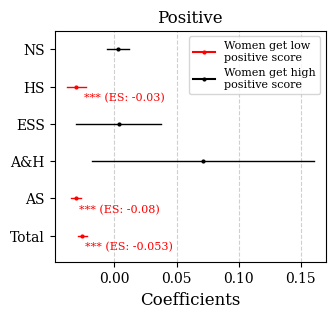

In [ ]:
def plot_ci_sentiment_pos(a, title):
    a["gender"] = a["est"].apply(lambda x: 1 if x > 0 else 0)
    # print(a)

    # a['odds_ratio'] = a['est'].apply(lambda x: math.exp(x))
    a["odds_ratio"] = a["est"]

    left_ci = []
    right_ci = []

    for ind in a.index:
        # left_ci.append(math.exp(a['est'][ind] - 1.96 * a['error'][ind]))
        # right_ci.append(math.exp(a['est'][ind] + 1.96 * a['error'][ind]))
        left_ci.append(a["est"][ind] - 1.96 * a["error"][ind])
        right_ci.append(a["est"][ind] + 1.96 * a["error"][ind])

    a["left_ci"] = left_ci
    a["right_ci"] = right_ci
    # print(a)

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.rcParams["font.family"] = "serif"

    # Create a DataFrame
    df = a.copy()

    # Set up the matplotlib figure
    plt.figure(figsize=(3.5, 3))

    # Add confidence interval lines with dots for odds ratio, color-coded by gender
    for i, row in df.iterrows():
        color = "red" if row["gender"] == 0 else "black"
        plt.plot(row["odds_ratio"], i, "o", markersize=2, color=color)
        plt.plot([row["left_ci"], row["right_ci"]], [i, i], color=color, linewidth=1)

    # Annotate significance
    for i, row in df.iterrows():
        plt.text(
            row["right_ci"] - 0.0015,
            i - 0.3,
            row["pval"],
            color="red" if row["gender"] == 0 else "black",
            verticalalignment="center",
            fontsize=8,
        )

    # Customize the plot
    plt.yticks(
        range(len(df)),
        df["Domain"],
        fontweight="normal",
        fontfamily="serif",
        fontsize=10,
    )
    plt.xlabel("Coefficients", fontsize=12, fontweight="normal", fontfamily="serif")
    # plt.title("Odds Ratio with Confidence Intervals", fontsize=16)
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    legend_elements = [
        Line2D(
            [0],
            [0],
            color="red",
            marker="o",
            linestyle="-",
            markersize=2,
            label="Women get low\npositive score",
        ),
        Line2D(
            [0],
            [0],
            color="black",
            marker="o",
            linestyle="-",
            markersize=2,
            label="Women get high\npositive score",
        ),
    ]

    plt.legend(
        handles=legend_elements, fontsize=8, loc="upper right"
    )  # , prop={'family':'serif'}
    plt.title(title)
    plt.ylim(-0.7, 5.5)
    # plt.xlim(-0.0567,0.20)
    # print(df)
    plt.show()


a = pd.DataFrame()
a["Domain"] = ["Total", "AS", "A&H", "ESS", "HS", "NS"]
a["est"] = [-0.025826, -0.031015, 0.071248, 0.003344, -0.030636, 0.002584]
a["error"] = [0.001731, 0.002162, 0.045387, 0.017528, 0.003908, 0.004553]
a["pval"] = ["*** (ES: -0.053)", "*** (ES: -0.08)", " ", " ", "*** (ES: -0.03)", " "]
plot_ci_sentiment_pos(a, "Positive")

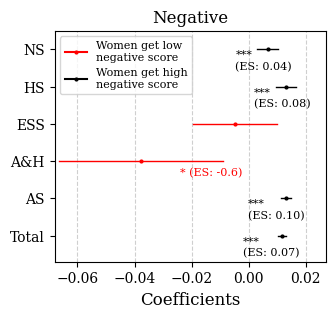

In [ ]:
def plot_ci_sentiment_neg(a, title):
    a["gender"] = a["est"].apply(lambda x: 1 if x > 0 else 0)
    # print(a)

    # a['odds_ratio'] = a['est'].apply(lambda x: math.exp(x))
    a["odds_ratio"] = a["est"]

    left_ci = []
    right_ci = []

    for ind in a.index:
        # left_ci.append(math.exp(a['est'][ind] - 1.96 * a['error'][ind]))
        # right_ci.append(math.exp(a['est'][ind] + 1.96 * a['error'][ind]))
        left_ci.append(a["est"][ind] - 1.96 * a["error"][ind])
        right_ci.append(a["est"][ind] + 1.96 * a["error"][ind])

    a["left_ci"] = left_ci
    a["right_ci"] = right_ci
    # print(a)

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.rcParams["font.family"] = "serif"

    # Create a DataFrame
    df = a.copy()

    # Set up the matplotlib figure
    plt.figure(figsize=(3.5, 3))

    # Add confidence interval lines with dots for odds ratio, color-coded by gender
    for i, row in df.iterrows():
        color = "red" if row["gender"] == 0 else "black"
        plt.plot(row["odds_ratio"], i, "o", markersize=2, color=color)
        plt.plot([row["left_ci"], row["right_ci"]], [i, i], color=color, linewidth=1)

    # Annotate significance
    for i, row in df.iterrows():
        plt.text(
            row["right_ci"] - 0.015,
            i - 0.3,
            row["pval"],
            color="red" if row["gender"] == 0 else "black",
            verticalalignment="center",
            fontsize=8,
        )

    # Customize the plot
    plt.yticks(
        range(len(df)),
        df["Domain"],
        fontweight="normal",
        fontfamily="serif",
        fontsize=10,
    )
    plt.xlabel("Coefficients", fontsize=12, fontweight="normal", fontfamily="serif")
    # plt.title("Odds Ratio with Confidence Intervals", fontsize=16)
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    legend_elements = [
        Line2D(
            [0],
            [0],
            color="red",
            marker="o",
            linestyle="-",
            markersize=2,
            label="Women get low\nnegative score",
        ),
        Line2D(
            [0],
            [0],
            color="black",
            marker="o",
            linestyle="-",
            markersize=2,
            label="Women get high\nnegative score",
        ),
    ]

    plt.legend(
        handles=legend_elements, fontsize=8, loc="upper left"
    )  # , prop={'family':'serif'}
    plt.title(title)
    plt.xlim(-0.068, 0.027)
    plt.ylim(-0.7, 5.5)
    # print(df)
    plt.show()


a = pd.DataFrame()
a["Domain"] = ["Total", "AS", "A&H", "ESS", "HS", "NS"]
a["est"] = [0.0116516, 0.0130674, -0.037791, -0.004829, 0.013117, 0.006651]
a["error"] = [0.0007131, 0.0008751, 0.014710, 0.007520, 0.001813, 0.001873]
a["pval"] = [
    "***\n(ES: 0.07)",
    "***\n(ES: 0.10)",
    "* (ES: -0.6)",
    " ",
    "***\n(ES: 0.08)",
    "***\n(ES: 0.04)",
]
plot_ci_sentiment_neg(a, "Negative")

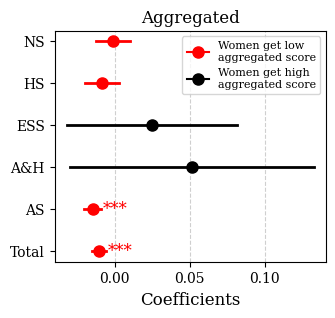

In [ ]:
def plot_ci_sentiment_agg(a, title):
    a["gender"] = a["est"].apply(lambda x: 1 if x > 0 else 0)
    # print(a)

    # a['odds_ratio'] = a['est'].apply(lambda x: math.exp(x))
    a["odds_ratio"] = a["est"]

    left_ci = []
    right_ci = []

    for ind in a.index:
        # left_ci.append(math.exp(a['est'][ind] - 1.96 * a['error'][ind]))
        # right_ci.append(math.exp(a['est'][ind] + 1.96 * a['error'][ind]))
        left_ci.append(a["est"][ind] - 1.96 * a["error"][ind])
        right_ci.append(a["est"][ind] + 1.96 * a["error"][ind])

    a["left_ci"] = left_ci
    a["right_ci"] = right_ci
    # print(a)

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.rcParams["font.family"] = "serif"

    # Create a DataFrame
    df = a.copy()

    # Set up the matplotlib figure
    plt.figure(figsize=(3.5, 3))

    # Add confidence interval lines with dots for odds ratio, color-coded by gender
    for i, row in df.iterrows():
        color = "red" if row["gender"] == 0 else "black"
        plt.plot(row["odds_ratio"], i, "o", markersize=8, color=color)
        plt.plot([row["left_ci"], row["right_ci"]], [i, i], color=color, linewidth=2)

    # Annotate significance
    for i, row in df.iterrows():
        plt.text(
            row["right_ci"] + 0.001,
            i,
            row["pval"],
            color="red" if row["gender"] == 0 else "black",
            verticalalignment="center",
            fontsize=12,
        )

    # Customize the plot
    plt.yticks(
        range(len(df)),
        df["Domain"],
        fontweight="normal",
        fontfamily="serif",
        fontsize=10,
    )
    plt.xlabel("Coefficients", fontsize=12, fontweight="normal", fontfamily="serif")
    # plt.title("Odds Ratio with Confidence Intervals", fontsize=16)
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    legend_elements = [
        Line2D(
            [0],
            [0],
            color="red",
            marker="o",
            linestyle="-",
            markersize=8,
            label="Women get low\naggregated score",
        ),
        Line2D(
            [0],
            [0],
            color="black",
            marker="o",
            linestyle="-",
            markersize=8,
            label="Women get high\naggregated score",
        ),
    ]

    plt.legend(
        handles=legend_elements, fontsize=8, loc="upper right"
    )  # , prop={'family':'serif'}
    plt.title(title)
    # plt.xlim(-0.07,0.025)
    # print(df)
    plt.show()


a = pd.DataFrame()
a["Domain"] = ["Total", "AS", "A&H", "ESS", "HS", "NS"]
a["est"] = [-0.0102529, -0.014782, 0.05157, 0.02475, -0.0085145, -0.001116]
a["error"] = [0.0023585, 0.002889, 0.04138, 0.02889, 0.0057174, 0.005843]
a["pval"] = ["***", "***", " ", " ", " ", " "]
plot_ci_sentiment_agg(a, "Aggregated")

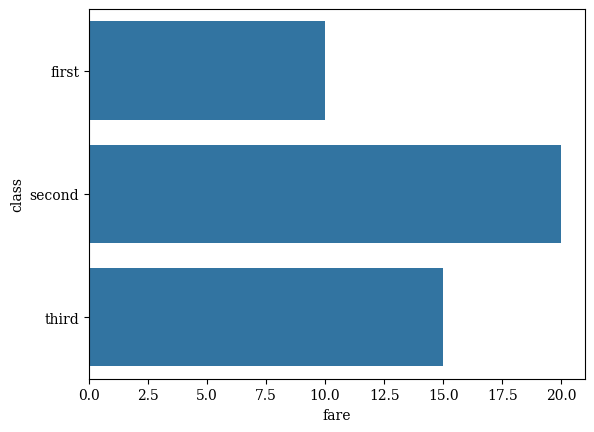

In [ ]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

# read a titanic.csv file
# from seaborn library
df = pd.DataFrame()
df["class"] = ["first", "second", "third"]
df["fare"] = [10, 20, 15]

# class v / s fare barplot in given order
"""sns.barplot(x = 'class', y = 'fare', data = df,
            order = ["Third", "Second", "First"])"""

sns.barplot(y="class", x="fare", data=df)

# Show the plot
plt.show()

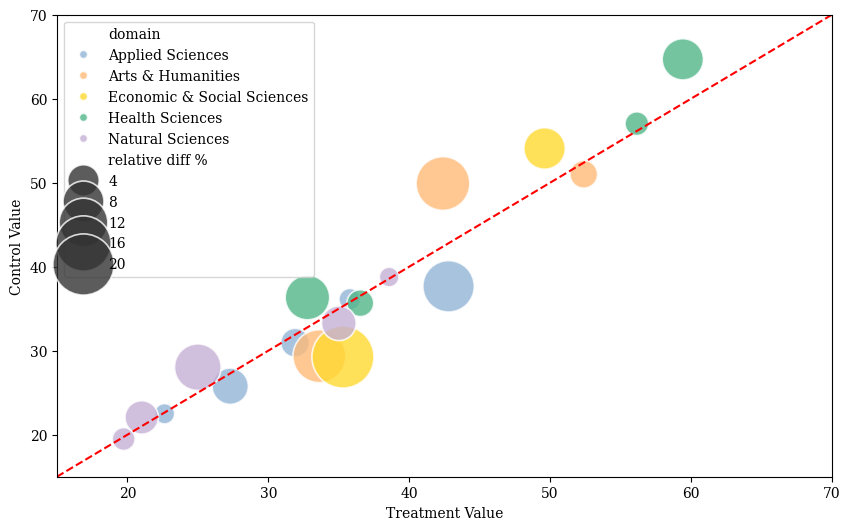

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
import random

# Set a seed for reproducibility
random.seed(42)
plt.rcParams["font.family"] = "serif"
df = pd.DataFrame()
custom_colors = [
    "#91b5d6",
    "#91b5d6",
    "#91b5d6",
    "#91b5d6",
    "#91b5d6",
    "#ffbb78",
    "#ffbb78",
    "#ffbb78",
    "#ffd92f",
    "#ffd92f",  #'#1f77b4',
    "#51b689",
    "#51b689",
    "#51b689",
    "#51b689",
    "#c5b0d5",
    "#c5b0d5",
    "#c5b0d5",
    "#c5b0d5",
    "#c5b0d5",
]
domain_colors = {
    "Applied Sciences": "#91b5d6",
    "Arts & Humanities": "#ffbb78",
    "Economic & Social Sciences": "#ffd92f",
    "Health Sciences": "#51b689",
    "Natural Sciences": "#c5b0d5",
}
df["domain"] = [
    "Applied Sciences",
    "Applied Sciences",
    "Applied Sciences",
    "Applied Sciences",
    "Applied Sciences",
    "Arts & Humanities",
    "Arts & Humanities",
    "Arts & Humanities",
    "Economic & Social Sciences",
    "Economic & Social Sciences",
    "Health Sciences",
    "Health Sciences",
    "Health Sciences",
    "Health Sciences",
    "Natural Sciences",
    "Natural Sciences",
    "Natural Sciences",
    "Natural Sciences",
    "Natural Sciences",
]
df["subdomain"] = [
    "Agri., Fish. & Forestry",
    "Built Env. & Design",
    "Enab. & Strategic Tech.",
    "Engineering",
    "Info. & Com. Tech.",
    "Com. & Text. Studies",
    "Historical Studies",
    "Philosophy & Theology",
    "Econ & Business",
    "Social Sciences",
    "Biomedical Research",
    "Clinical Medicine",
    "Psych. & Cog. Sciences",
    "Public Health & Services",
    "Biology",
    "Chemistry",
    "Earth & Env. Sciences",
    "Math. & Stat.",
    "Physics & Astronomy",
]
# df['value'] = [5,-10,-5,-20,25,-30,5,-11,16,21,-26,31,-15,12,17,-22,27,-30,24,-34]
df["relative diff %"] = [
    13.616,
    0.954,
    0.635,
    5.91,
    3.06,
    2.713,
    15.044,
    14.567,
    20.670,
    8.25,
    9.773,
    2.435,
    1.52,
    8.142,
    0.483,
    1.278,
    5.219,
    10.852,
    4.740,
]

df["con_val"] = [
    37.667,
    36.129,
    22.495,
    25.775,
    30.954,
    51.006,
    49.906,
    29.35,
    29.253,
    54.079,
    36.33,
    35.665,
    57.029,
    64.69,
    38.769,
    19.488,
    33.27,
    28.04,
    22.06,
]

df["treat_val"] = [
    42.796,
    35.784,
    22.638,
    27.30,
    31.904,
    52.39,
    42.397,
    33.628,
    35.30,
    49.61,
    32.78,
    36.534,
    56.160,
    59.42,
    38.58,
    19.737,
    35.01,
    25.0,
    21.018,
]

df["value"] = [
    38.034,
    34.696,
    23.36,
    23.78,
    28.459,
    52.81,
    47.069,
    29.888,
    31.457,
    53.86,
    35.934,
    36.618,
    56.365,
    62.126,
    38.22,
    21.158,
    33.693,
    22.333,
    20.034,
]

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=df,
    x="treat_val",
    y="con_val",
    hue="domain",
    size="relative diff %",
    sizes=(200, 2000),
    palette=domain_colors,
    alpha=0.8,
)
a1, a2 = [df["treat_val"].min(), df["con_val"].min()], [
    df["treat_val"].max(),
    df["con_val"].max(),
]
# plt.plot([df['treat_val'].min(), df['treat_val'].max()], [df['treat_val'].min(), df['treat_val'].max()], linestyle='--', color='red')
# plt.plot(a1, a2, linestyle='--', color='red')
ax.axline((0, 0), slope=1, linestyle="--", color="red")

# Set labels and title
plt.xlabel("Treatment Value")
plt.ylabel("Control Value")
plt.xlim(15, 70)
plt.ylim(15, 70)


plt.show()